<a href="https://colab.research.google.com/github/laraccano84/Mentoria_mumuki/blob/main/Regresi%C3%B3n_logistica_Mentoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn 
import datetime as dt
import requests
import json
import math
import glob
import cufflinks as cf
import scipy.stats

In [ ]:
sns  = seaborn

In [ ]:
url = 'https://raw.githubusercontent.com/laraccano84/Mentoria_mumuki/main/Entregable-3/df_regresion_log.csv'
df_reg_log = pd.read_csv(url)

Se realizó un filtro del data set creado en la notebook de analisis multivariado, con el criterio de quedarnos con las filas de los envios de ejercicios menores al numero 11 del orden natural de presentación. 

In [ ]:
df_reg_log.sample(4)

,Cantidad_Envios,Ejercicios_unicos_caller,Cant_envios_paso,Cant_envios_no_paso,Cant_ejerc_pasoTotal_envios,Cant_ejerc_no_pasoTotal_envios,dif_ejerciciosUnicos_Paso,cant_envios,cant_ejercicios_unicos,f_primer_envio,f_ultimo_envio,tiempo_invertido,tiempo_invertido_horas,tiempo_invertido_dias,Avance_caller,avg_tiempo,ID_ultimo_ejercicio_enviado,Ejercicios_unicos_other,Avance_other,Avance_original
217,91,10,20,71,10,8,0,91,10,2020-09-14 13:27:42.530,2020-10-05 13:44:54.240,21 days 00:17:11.710000,504.29,21.0121,0,5.541648,10,40,Completo,0
125,40,10,24,16,10,6,0,40,10,2020-05-20 04:19:57.700,2020-06-07 20:10:39.919,18 days 15:50:42.219000,447.85,18.6604,0,11.196250,9,40,Completo,0
97,43,10,14,29,10,6,0,43,10,2020-05-15 00:10:23.444,2020-05-15 11:50:46.350,0 days 11:40:22.906000,11.67,0.4862,0,0.271395,10,28,Deserto,1
133,61,10,21,40,10,7,0,61,10,2020-05-24 22:28:27.617,2020-05-26 17:51:49.478,1 days 19:23:21.861000,43.39,1.8079,0,0.711311,10,40,Completo,0


Nos quedamos con las columnas que nos interesan, al ver de nuevo la matriz de correlación.

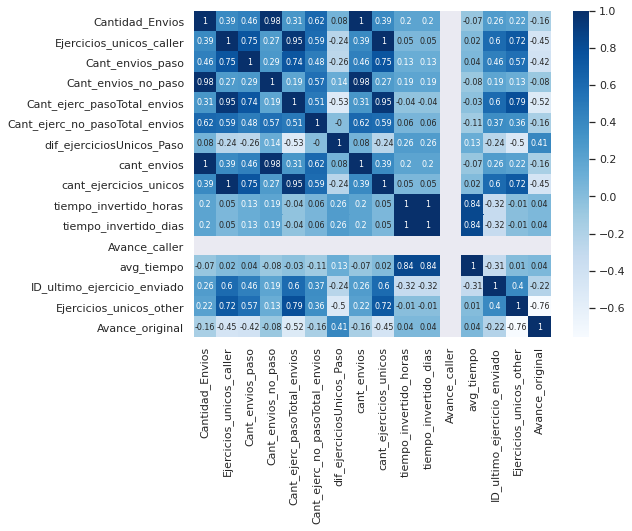

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
correlation_matrix = df_reg_log.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', annot_kws = {"size": 8});

In [ ]:
df_reg_log_prediccion=df_reg_log.drop(["f_primer_envio",'f_ultimo_envio', 'tiempo_invertido', 'Avance_other', 'Avance_caller'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# División entre instancias y etiquetas
X, y = df_reg_log_prediccion.drop(['Avance_original'], axis=1), df_reg_log_prediccion.Avance_original

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((207, 14), (52, 14))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
def get_metrics(true_values, pred_values):
    
    result = {
        'precision_score' : precision_score(true_values, pred_values) ,
        'recall_score': recall_score(true_values, pred_values),
        'f1_score' : f1_score(true_values, pred_values),
        'accuracy_score': accuracy_score(true_values, pred_values)
    }
    
    return result

def plot_metrics(model, X_train, y_train, y_train_pred):
    result = get_metrics(y_train, y_train_pred)
    print(result)
    
    plot_confusion_matrix(model, X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)

Obtenemos la matriz de confusión y las métricas del modelo

{'precision_score': 0.9864864864864865, 'recall_score': 0.8295454545454546, 'f1_score': 0.9012345679012347, 'accuracy_score': 0.9227053140096618}


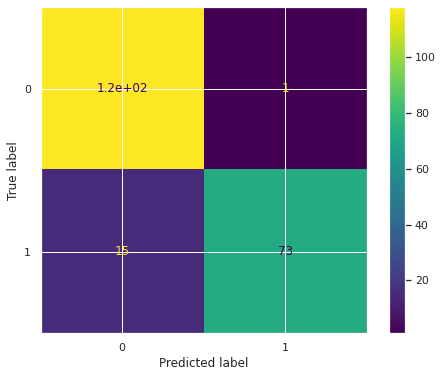

In [ ]:
plot_metrics(model, X_train, y_train, y_train_pred)

#### Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform
from sklearn.pipeline import Pipeline

In [ ]:
def print_results(cv):
    results = cv.cv_results_
    params = results['params']
    mean = results['mean_test_score']
    std = results['std_test_score']
    rank = results['rank_test_score']
    
    #print("crit.\tdepth\t| mean\tstd\trank")
    print("mean\tstd\trank")
    
    for m, s, r in zip( mean, std, rank):
        #print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")
        print(f"{m:0.2f}\t{s:0.2f}\t{r}")

    for param in params:
        print (param)

In [ ]:
param_dist = {
    'sgdc__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron'],
    'sgdc__alpha': [0.1,0.01,0.001,0.0001],
    'sgdc__penalty' : ['l2' , 'l1' , 'elasticnet']
}

In [ ]:
param_dist

{'sgdc__alpha': [0.1, 0.01, 0.001, 0.0001],
 'sgdc__loss': ['hinge',
  'log',
  'modified_huber',
  'squared_hinge',
  'perceptron'],
 'sgdc__penalty': ['l2', 'l1', 'elasticnet']}

In [ ]:
test_model = Pipeline(steps = [('standard', StandardScaler()),('sgdc', SGDClassifier(random_state=0))])
cv = GridSearchCV(test_model, param_dist, scoring='accuracy', cv=5 ,verbose=10)

In [ ]:
cv.fit(X_train,y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2, score=0.905, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2, score=0.905, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2, score=0.829, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2, score=0.805, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l2, score=0.902, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l1 .............
[CV]  sgdc__alpha=0.1, sgdc__loss=hinge, sgdc__penalty=l1, score=0.905, total=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=l1, score=0.878, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet .......
[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet, score=0.881, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet .......
[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet, score=0.905, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet .......
[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet, score=0.805, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet .......
[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet, score=0.805, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet .......
[CV]  sgdc__alpha=0.1, sgdc__loss=log, sgdc__penalty=elasticnet, score=0.902, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=modified_huber, sgdc__penalty=l2 ....
[CV]  sgdc__alpha=0.1, sgdc__l

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteratio

[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l2, score=0.463, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l2 .....
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l2, score=0.439, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1 .....
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.881, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1 .....
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.905, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1 .....
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.951, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1 .....
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.976, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=l1 .....
[CV]  sgdc

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteratio

[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.500, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet 
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.488, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet 
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.463, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet 
[CV]  sgdc__alpha=0.1, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.439, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=perceptron, sgdc__penalty=l2 ........
[CV]  sgdc__alpha=0.1, sgdc__loss=perceptron, sgdc__penalty=l2, score=0.905, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=perceptron, sgdc__penalty=l2 ........
[CV]  sgdc__alpha=0.1, sgdc__loss=perceptron, sgdc__penalty=l2, score=1.000, total=   0.0s
[CV] sgdc__alpha=0.1, sgdc__loss=perceptron, s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.976, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1 ....
[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.951, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1 ....
[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.927, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1 ....
[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=l1, score=0.976, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet 
[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.619, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet 
[CV]  sgdc__alpha=0.01, sgdc__loss=squared_hinge, sgdc__penalty=elasticnet, score=0.571, total=   0.0s
[CV] sgdc__alpha=0.01, sgdc__loss=squared_hinge, sg

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.7s finished


In [ ]:
y_pred = cv.predict(X_train);

{'precision_score': 0.9263157894736842, 'recall_score': 1.0, 'f1_score': 0.9617486338797814, 'accuracy_score': 0.966183574879227}


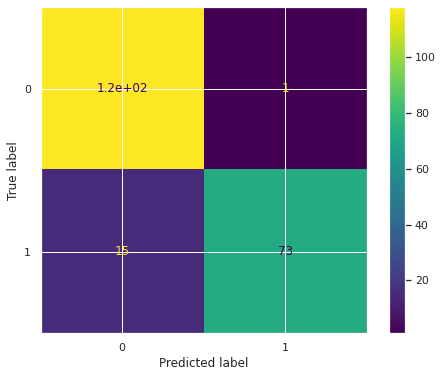

In [ ]:
plot_metrics(model, X_train, y_train, y_pred)

In [ ]:
y_pred = cv.predict(X_test);

{'precision_score': 0.9285714285714286, 'recall_score': 1.0, 'f1_score': 0.962962962962963, 'accuracy_score': 0.9615384615384616}


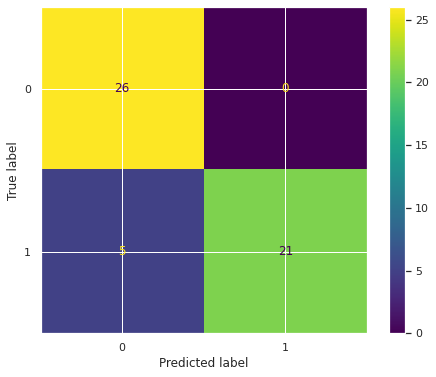

In [ ]:
plot_metrics(model, X_test, y_test, y_pred)

Observación: A continuación la siguiente semana vamos a analizar las metricas obtenidas y realizar los ajustes de hiperparametros correspondientes.